In [2]:
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [3]:
#create engine 
engine = create_engine(f'postgresql://postgres:@localhost:5432/EmployeeSQL_DB')

In [4]:
#create connection to database
conn = engine.connect()

In [5]:
#read in departments table from postgres database using sqlalchemy syntax
departments = pd.read_sql('SELECT * FROM departments',conn)
departments

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [6]:
#read in dept_emp table from postgres database using sqlalchemy syntax
dept_emp = pd.read_sql('SELECT * FROM dept_emp',conn)
dept_emp

,emp_no,dept_name
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [7]:
#read in salaries table from postgres database using sqlalchemy syntax
salaries = pd.read_sql('SELECT * FROM salaries',conn)
salaries

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [8]:
#read in employees table from postgres database using sqlalchemy syntax
employees = pd.read_sql('SELECT * FROM employees',conn)
employees = employees.rename(columns = {"emp_title":"title_id"})
employees.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [9]:
#read in titles table from postgres database using sqlalchemy syntax
titles = pd.read_sql('SELECT * FROM titles',conn)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [10]:
#merge title and employees table
emp_title = pd.merge(employees,titles,on ="title_id",how = "left")

In [11]:
emp_title.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,Senior Engineer


In [13]:
#merge new employees/titles table with salaries data table tp create complete set
combined_df = pd.merge(emp_title, salaries, on = "emp_no",how = "right")

In [14]:
combined_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,Engineer,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,Engineer,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,Senior Engineer,40000


In [20]:
combined_df["last_name"].nunique()

1638

In [21]:
combined_df["emp_no"].nunique()

300024

Text(0.5, 0, 'Salary Amount')

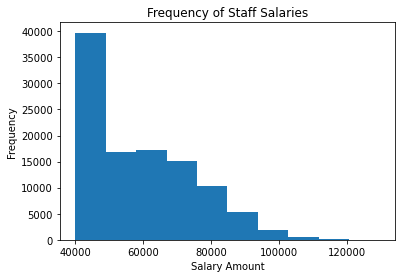

In [15]:
staff_df = combined_df.loc[combined_df['title']=='Staff']
staff_df["salary"].plot.hist()
plt.title("Frequency of Staff Salaries")
plt.xlabel("Salary Amount")

Text(0.5, 0, 'Salary Amount')

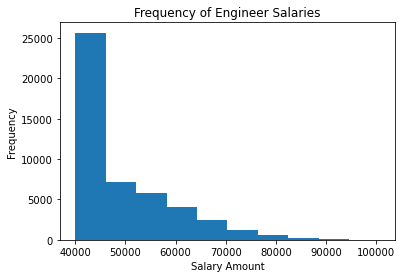

In [104]:
engineer_df = combined_df.loc[combined_df['title']=='Engineer']
engineer_df["salary"].plot.hist()
plt.title("Frequency of Engineer Salaries")
plt.xlabel("Salary Amount")

Text(0.5, 0, 'Salary Amount')

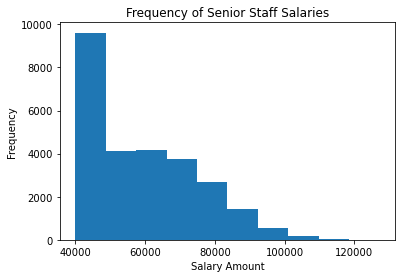

In [105]:
sen_staff_df = combined_df.loc[combined_df['title']=='Senior Staff']
sen_staff_df["salary"].plot.hist()
plt.title("Frequency of Senior Staff Salaries")
plt.xlabel("Salary Amount")

Text(0.5, 0, 'Salary Amount')

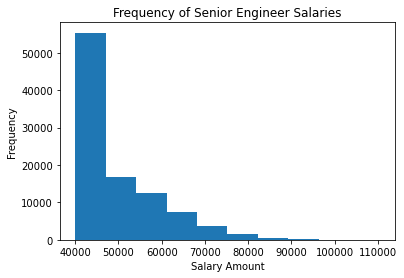

In [106]:
sen_eng_df = combined_df.loc[combined_df['title']=='Senior Engineer']
sen_eng_df["salary"].plot.hist()
plt.title("Frequency of Senior Engineer Salaries")
plt.xlabel("Salary Amount")

Text(0.5, 0, 'Salary Amount')

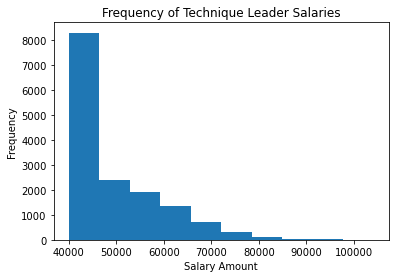

In [107]:
tl = combined_df.loc[combined_df['title']=='Technique Leader']
tl["salary"].plot.hist()
plt.title("Frequency of Technique Leader Salaries")
plt.xlabel("Salary Amount")

Text(0.5, 0, 'Salary Amount')

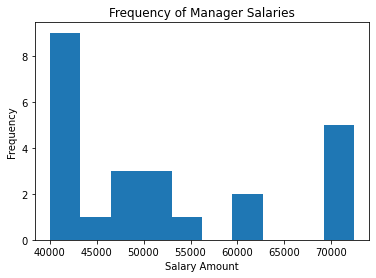

In [108]:
manager_df = combined_df.loc[combined_df['title']=='Manager']
manager_df["salary"].plot.hist()
plt.title("Frequency of Manager Salaries")
plt.xlabel("Salary Amount")

In [114]:
#groupe complete dataset by title to perform aggregate mean calculation of salary by title
grouped_df = combined_df.groupby('title').mean()['salary']
grouped_df


title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

No handles with labels found to put in legend.


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

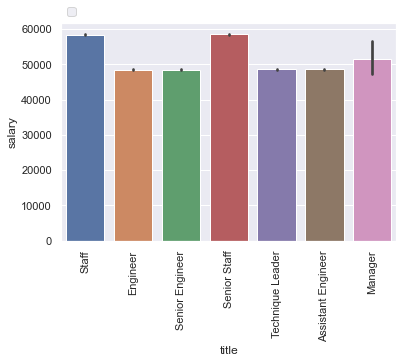

In [129]:
#seaborn barchart of average salaries by role
sns.set()
fig, ax = plt.subplots()
# ax.plot(x, y, marker='s', linestyle='none', label='small')
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
g = sns.barplot(x="title", y="salary", data=combined_df, orient = 'v')
plt.xticks(rotation=90)

In [18]:
#directions from my boss to search for my id number
my_id = pd.read_sql("SELECT * FROM employees WHERE emp_no = 499942", conn)
my_id

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


Interpretation of Data Review:
This dataset is atypical for several reasons based on the following observations:
1) There are over 30,000 employees, but only 1638 unique last names
2) General Staff average salary is significantly higher than both Engineer and Senior Engineers; additionally, there is no significant difference in average salary amongst general and Senior staff (average pay is about the same where one would expect senior level employees to have higher salary on average.)
3) $40,000 annually is the most common (mode) salary for every role which doesn't seem commensurate with reality.